<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 09-1 de Data Science

## PCA
* Tempo estimado: **60** minutos

## Objetivos


Após completar essa aula você será capaz de :

* Entender o algoritmo PCA
* Realizar Ranqueamentos com PCA

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=None, suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# Usando um estilo
mpl.style.use(['seaborn-v0_8-white']) 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Obtendo Dados

In [2]:
caminho = 'https://raw.githubusercontent.com/EduPekUfpr/PPGOLD7037/main/Data/NotasFatorial.csv'
df_notas = pd.read_csv(caminho)
df_notas.head()
df_notas.set_index(keys='Estudante',inplace=True)
df_notas.index.name=None
df_notas

,Nota de Finanças,Nota de Custos,Nota de Marketing,Nota de Atuária
Gabriela,5.8,4.0,1.0,6.0
Luiz Felipe,3.1,3.0,10.0,2.0
Patrícia,3.1,4.0,4.0,4.0
Gustavo,10.0,8.0,8.0,8.0
Letícia,3.4,2.0,3.2,3.2
...,...,...,...,...
Sheila,7.7,4.3,5.2,5.1
Pedro,9.0,6.0,4.0,9.8
Horácio,9.3,6.0,7.0,7.0
Leandro,9.0,6.5,3.0,9.0


<AxesSubplot: >

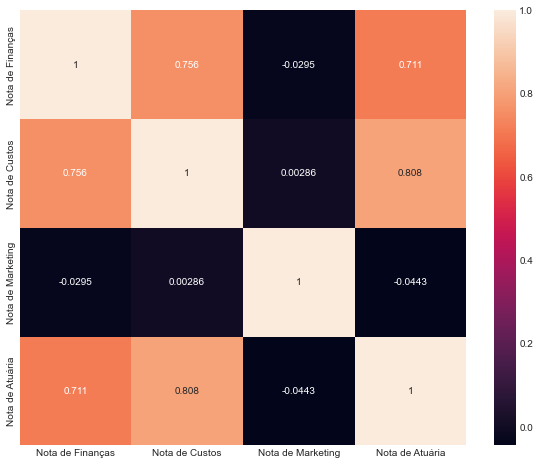

In [3]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_notas.corr(),annot=True,fmt='.3g')

## Padronizando

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(df_notas)
print(X)

[[-0.01094269 -0.29340898 -1.65874597  0.27434724]
 [-0.87992139 -0.70262652  1.53935038 -1.32534513]
 [-0.87992139 -0.29340898 -0.59271386 -0.52549895]
 [ 1.34080194  1.3434612   0.8286623   1.07419343]
 [-0.7833682  -1.11184407 -0.87698909 -0.84543742]
 [ 1.34080194  2.16189629 -1.65874597  1.87403962]
 [-0.26841786  0.11580857  0.8286623  -0.12557585]
 [-0.13968028  0.52502611  0.11797422  0.27434724]
 [ 0.0212417  -0.29340898 -0.59271386 -0.52549895]
 [ 0.08561049 -0.29340898 -0.59271386 -0.52549895]
 [-0.7511838  -1.11184407  1.43274717 -1.32534513]
 [ 0.60056083  2.16189629  1.53935038  1.87403962]
 [-0.42933984  2.16189629 -0.23736982 -0.12557585]
 [ 1.34080194 -0.29340898  1.18400634  1.47411653]
 [ 0.11779489  2.16189629  1.53935038  1.87403962]
 [ 0.92240479  2.16189629  1.18400634  1.47411653]
 [ 1.34080194  0.52502611  0.11797422  0.27434724]
 [ 1.34080194  0.52502611  0.8286623   1.07419343]
 [ 1.27643314  2.16189629  0.47331826  1.87403962]
 [ 1.34080194  2.16189629 -1.30

## PCA


* Componentes principais no espaço de características, representando as direções de máxima variância nos dados.
* Os componentes são ordenados por variação_explicativa decrescente.
* Em resumo são os autovetores da matriz de covariância dos dados originais

In [5]:
df_components = pd.DataFrame(index=df_notas.columns)
df_components

""
Nota de Finanças
Nota de Custos
Nota de Marketing
Nota de Atuária


In [6]:
factor_n=4
pca = PCA(n_components=factor_n)
pca.fit(X)

for i in range(factor_n):
    df_components[pca.get_feature_names_out()[i]] = pca.components_[i]
df_components

,pca0,pca1,pca2,pca3
Nota de Finanças,0.564257,-0.007084,-0.800525,-0.201799
Nota de Custos,0.588604,-0.048571,0.219567,0.776515
Nota de Marketing,-0.026761,-0.998743,0.000657,-0.042372
Nota de Atuária,0.578310,0.010131,0.557628,-0.595404


<AxesSubplot: >

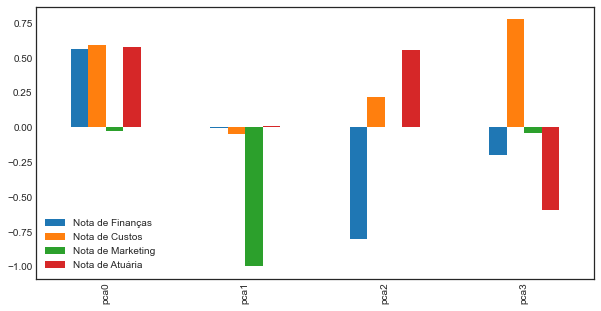

In [7]:
df_components.transpose().plot.bar(figsize=(10,5))

Text(0.5, 1.0, 'Components')

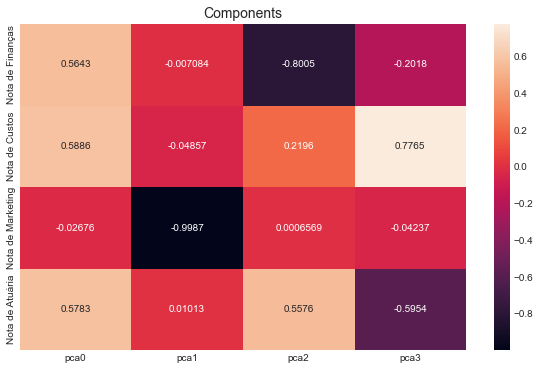

In [8]:
fig  = plt.figure(figsize=(10,6))
ax = sns.heatmap(df_components,annot=True,fmt='.4g')
ax.set_title("Components",fontdict={'fontsize':14})

### fit_transform()

In [9]:
X_fitted = pca.fit_transform(X)
print(X_fitted)

[[ 0.02417163  1.67376958  0.09623124 -0.31869085]
 [-1.7177264  -1.51048202 -0.18791294  0.35585641]
 [-0.9572434   0.60712988  0.34655403  0.28772909]
 [ 2.14636514 -0.89149032 -0.17882139  0.09795502]
 [-1.56191301  0.92687496 -0.08903389 -0.1647446 ]
 [ 3.15722486  1.56114275  0.44526277  0.36264818]
 [-0.17808919 -0.83261651  0.17082267  0.18374948]
 [ 0.3857176  -0.13955817  0.38015718  0.26753186]
 [-0.44875543  0.60074574 -0.37484979  0.10587566]
 [-0.41243486  0.60028973 -0.42637863  0.09288613]
 [-1.88309966 -1.38504854 -0.38089125  0.01663066]
 [ 2.65395304 -1.62769013  1.03994518  0.37651699]
 [ 0.96397401  0.13383447  0.74819754  1.85021212]
 [ 1.40466616 -1.16283092 -0.31498195 -1.42627234]
 [ 2.38154878 -1.62427006  1.42641151  0.47393847]
 [ 2.6137859  -1.27912449  0.55905913  0.56474187]
 [ 1.22109068 -0.15004639 -0.80500624 -0.03122734]
 [ 1.66463066 -0.85173777 -0.35852259 -0.5375724 ]
 [ 3.06384744 -0.56778591  0.49819208  0.28529718]
 [ 3.07833154  1.20502978  0.37

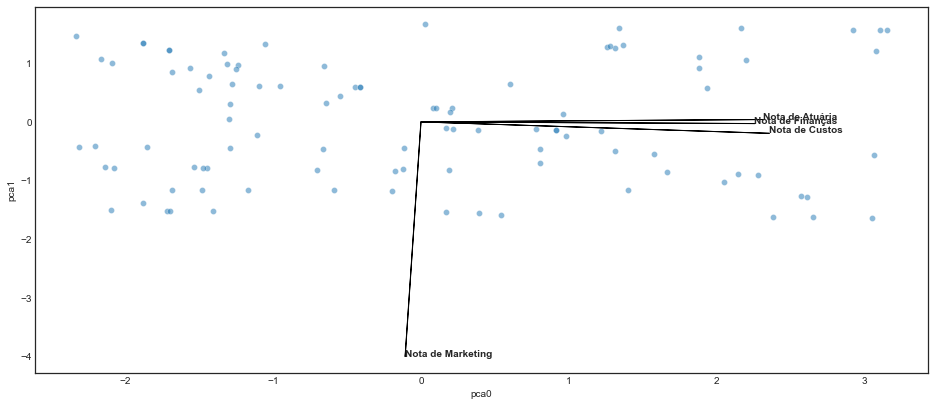

In [10]:
fig, ax = plt.subplots(figsize=(16,16))
pca_df = pd.DataFrame(
                        X_fitted,
                        columns=pca.get_feature_names_out(),
                    )

evr = pca.explained_variance_ratio_
x_idx = 0 # x_pc
y_idx = 1 # y_pc
ax.set_aspect(evr[y_idx] / evr[x_idx])
x_col = pca_df.columns[x_idx]
y_col = pca_df.columns[y_idx]
sns.scatterplot(
            x=x_col,
            y=y_col,
            data=pca_df,
            alpha=0.5,
            ax=ax,
        )
scale=4
for idx, s in df_components.iterrows():
    plt.arrow(
                0,
                0,
                s[0] * scale,
                s[1] * scale,
                color="k",
            )
    plt.text(
                s[0] * scale,
                s[1] * scale,
                idx,
                weight="bold",
            )

### explained_variance_

* A quantidade de variação explicada por cada um dos componentes selecionados.
* A estimativa de variância usa n_amostras - 1 grau de liberdade.
* Igual a n_componentes maiores valores próprios da matriz de covariância de X.

In [11]:
print(pca.explained_variance_)
print(pca.explained_variance_.sum())

[2.54356244 1.01048414 0.30062207 0.1857354 ]
4.040404040404039


<BarContainer object of 4 artists>

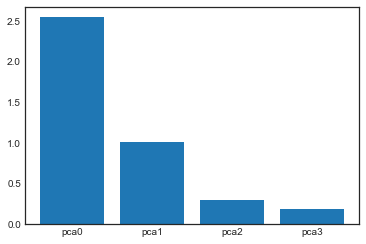

In [12]:
plt.bar(x=pca.get_feature_names_out(), height = pca.explained_variance_,width = 0.8) 

### Standard Deviation

In [13]:
print(np.sqrt(pca.explained_variance_))

[1.59485499 1.0052284  0.54829013 0.4309703 ]


### explained_variance_ratio_

* Porcentagem de variação explicada por cada um dos componentes selecionados.
* Se n_componentes não estiver definido, todos os componentes são armazenados e a soma das proporções é igual a 1,0.


In [14]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.6295317  0.25009482 0.07440396 0.04596951]
1.0


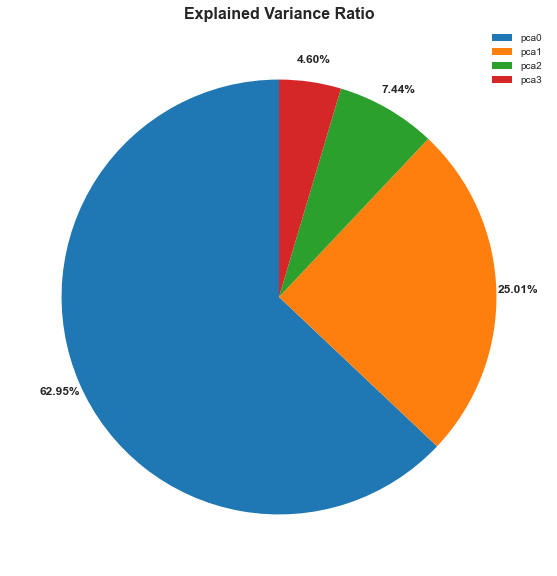

In [15]:
mpl.style.use(['seaborn-v0_8-white']) 
fig = plt.figure(figsize = (10,10))
plt.pie(x=pca.explained_variance_ratio_,labels=None,autopct='%.2f%%',pctdistance=1.1,startangle=90,textprops={'fontsize':12,'fontweight':'bold'}) 
plt.title("Explained Variance Ratio",fontdict={'fontsize':16,'fontweight':'bold'})
plt.legend(pca.get_feature_names_out())

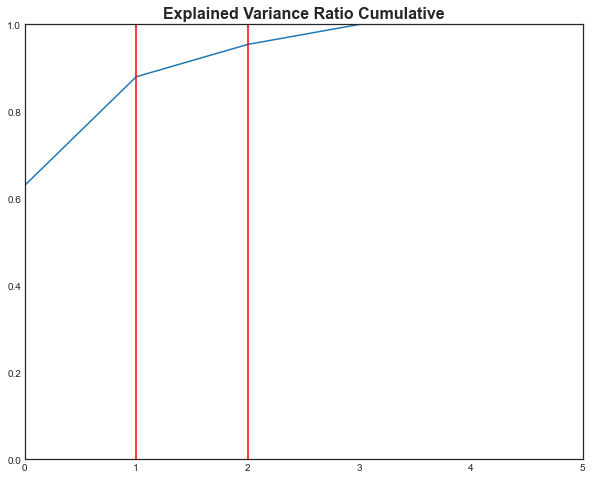

In [16]:
mpl.style.use(['seaborn-v0_8-white']) 
fig, ax = plt.subplots(figsize = (10,8))
n = np.size(pca.get_feature_names_out())
ax.plot(np.cumsum(pca.explained_variance_ratio_),)
plt.title("Explained Variance Ratio Cumulative",fontdict={'fontsize':16,'fontweight':'bold'})
ax.set_xlim(0,n+1)
ax.set_ylim(0,1)
ax.vlines(1,ymin=0,ymax=1,colors='r')
ax.vlines(2,ymin=0,ymax=1,colors='r')

## inverse_transform()

* Transformar os dados de volta ao seu espaço original.
* Em outras palavras, devolver uma entrada X_original cuja transformação seria X.

In [17]:
print(pca.inverse_transform(X_fitted))

[[-0.01094269 -0.29340898 -1.65874597  0.27434724]
 [-0.87992139 -0.70262652  1.53935038 -1.32534513]
 [-0.87992139 -0.29340898 -0.59271386 -0.52549895]
 [ 1.34080194  1.3434612   0.8286623   1.07419343]
 [-0.7833682  -1.11184407 -0.87698909 -0.84543742]
 [ 1.34080194  2.16189629 -1.65874597  1.87403962]
 [-0.26841786  0.11580857  0.8286623  -0.12557585]
 [-0.13968028  0.52502611  0.11797422  0.27434724]
 [ 0.0212417  -0.29340898 -0.59271386 -0.52549895]
 [ 0.08561049 -0.29340898 -0.59271386 -0.52549895]
 [-0.7511838  -1.11184407  1.43274717 -1.32534513]
 [ 0.60056083  2.16189629  1.53935038  1.87403962]
 [-0.42933984  2.16189629 -0.23736982 -0.12557585]
 [ 1.34080194 -0.29340898  1.18400634  1.47411653]
 [ 0.11779489  2.16189629  1.53935038  1.87403962]
 [ 0.92240479  2.16189629  1.18400634  1.47411653]
 [ 1.34080194  0.52502611  0.11797422  0.27434724]
 [ 1.34080194  0.52502611  0.8286623   1.07419343]
 [ 1.27643314  2.16189629  0.47331826  1.87403962]
 [ 1.34080194  2.16189629 -1.30

## Cargas fatoriais 
* Correlações de pearson entre as variáveis originais e os componentes principais
* Autovetor, representando a variância de cada componente.
* Raiz quadrada dos autovetores.

In [18]:
autovetores = df_components.loc[:,pca.get_feature_names_out()[range(2)]]
autovetores = np.array(autovetores)  
desvio_padrao = np.sqrt(pca.explained_variance_[range(2)])
print('autovetores\n',autovetores)
print('desvio_padrao\n',desvio_padrao)

autovetores
 [[ 0.56425743 -0.00708433]
 [ 0.58860438 -0.04857141]
 [-0.02676132 -0.9987432 ]
 [ 0.57830984  0.01013133]]
desvio_padrao
 [1.59485499 1.0052284 ]


In [19]:
# Scores Fatoriais
scores = desvio_padrao*autovetores
print('scores\n',scores)


scores
 [[ 0.89990877 -0.00712137]
 [ 0.93873863 -0.04882536]
 [-0.04268042 -1.00396503]
 [ 0.92232033  0.0101843 ]]


In [20]:
# Comunalidade
comunalidade = np.sum(scores**2,axis=1)
comunalidade

array([0.80988651, 0.88361414, 1.00976741, 0.85077852])

## Ranqueamento

In [21]:
pca_f2 = PCA(n_components=2)
pca_f2.fit(X)
X_fitted_f2 = pca_f2.fit_transform(X)
print(X_fitted_f2)

[[ 0.02417163  1.67376958]
 [-1.7177264  -1.51048202]
 [-0.9572434   0.60712988]
 [ 2.14636514 -0.89149032]
 [-1.56191301  0.92687496]
 [ 3.15722486  1.56114275]
 [-0.17808919 -0.83261651]
 [ 0.3857176  -0.13955817]
 [-0.44875543  0.60074574]
 [-0.41243486  0.60028973]
 [-1.88309966 -1.38504854]
 [ 2.65395304 -1.62769013]
 [ 0.96397401  0.13383447]
 [ 1.40466616 -1.16283092]
 [ 2.38154878 -1.62427006]
 [ 2.6137859  -1.27912449]
 [ 1.22109068 -0.15004639]
 [ 1.66463066 -0.85173777]
 [ 3.06384744 -0.56778591]
 [ 3.07833154  1.20502978]
 [-1.88251785  1.3485738 ]
 [ 3.10905141  1.565118  ]
 [ 2.92114116  1.56410681]
 [ 1.25912858  1.26954338]
 [-0.41243486  0.60028973]
 [-1.85742408 -0.42682544]
 [-1.31570246  0.99339602]
 [ 2.19866724  1.06044562]
 [ 3.0534793  -1.63270624]
 [-1.88251785  1.3485738 ]
 [-1.28226746  0.65168361]
 [ 0.20886138  0.24442793]
 [ 0.91312778 -0.13606858]
 [ 0.17086837 -1.53384379]
 [ 1.34049167  1.59568806]
 [ 1.88267874  1.10625401]
 [ 1.31359909  1.26391117]
 

In [22]:
df_notas[['PCA1','PCA2']] = X_fitted_f2

In [23]:
# Como o Fator2 pegou a correlação negativa de marquetin, quanto maior a nota mais negativo, temos que multiplicar por menos 1 para o ranking se ajustar
# elas são ortogonais
# ponderando pela proporção
ratio_pca1 =pca_f2.explained_variance_ratio_[0]
ratio_pca2 =pca_f2.explained_variance_ratio_[1]*-1
print('ratio_pca1= ',ratio_pca1,'ratio_pca2= ',ratio_pca2)

ratio_pca1=  0.6295317026757451 ratio_pca2=  -0.2500948246879979


In [24]:
df_notas['Rank'] = df_notas['PCA1'] * ratio_pca1 + df_notas['PCA2'] * ratio_pca2

In [25]:
df_notas.sort_values(by='Rank',inplace=True,ascending=False)
df_notas.head(20)

,Nota de Finanças,Nota de Custos,Nota de Marketing,Nota de Atuária,PCA1,PCA2,Rank
Adelino,9.9,10.0,10.0,10.0,3.053479,-1.632706,2.330593
Renata,7.7,10.0,10.0,10.0,2.653953,-1.627690,2.077824
Cecília,9.8,10.0,7.0,10.0,3.063847,-0.567786,2.070789
Felipe,8.7,10.0,9.0,9.0,2.613786,-1.279124,1.965364
Claudio,9.8,9.0,9.0,9.0,2.572682,-1.261756,1.935143
Giulia,6.2,10.0,10.0,10.0,2.381549,-1.624270,1.905482
Robson,9.8,9.0,8.0,7.7,2.281528,-0.912126,1.664412
Gisele,10.0,10.0,2.0,9.7,3.078332,1.205030,1.636536
Ovídio,10.0,10.0,1.0,10.0,3.157225,1.561143,1.597139
Gustavo,10.0,8.0,8.0,8.0,2.146365,-0.891490,1.574162


In [26]:
df_notas.tail(20)

,Nota de Finanças,Nota de Custos,Nota de Marketing,Nota de Atuária,PCA1,PCA2,Rank
Alexandre,3.9,2.9,3.2,3.2,-1.254331,0.907846,-1.016689
Bianca,4.1,3.0,3.0,3.0,-1.238278,0.975572,-1.023521
Danielle,3.5,2.0,7.0,2.0,-1.857424,-0.426825,-1.062561
Juliana,5.0,2.0,3.0,3.0,-1.315702,0.993396,-1.076720
Reinaldo,2.0,2.3,4.3,4.3,-1.499950,0.538174,-1.078860
Andréa,2.7,2.7,3.6,3.6,-1.431720,0.774219,-1.094941
Afonso,1.3,2.5,8.0,2.3,-2.076642,-0.785429,-1.110880
Angélica,3.5,3.6,2.4,2.4,-1.335781,1.175521,-1.134908
César,0.6,1.9,8.0,3.2,-2.140133,-0.768261,-1.155144
Letícia,3.4,2.0,3.2,3.2,-1.561913,0.926875,-1.215080


# References

[1] https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py

[2] Matt Harrinson - Machine Learning - Pocket Reference - O'Reilly

[3] Capítulo 09 do livro: FÁVERO, Luiz Paulo; BELFIORE, Patrícia. `Manual de análise de dados: estatística e modelagem multivariada com Excel®, SPSS® e Stata®`. Elsevier Brasil, 2017.

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

<a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 17-04-2023       | 1.0     | Hesau Hugo        | Inicial        |